In [1]:
import os
import sys
import time
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import msgpack as mp
import msgpack_numpy as mpn
import cv2
sys.path.append('..')
from support.camera_calibration import calibrate_camera_from_file

In [5]:
_pth = os.getcwd()
_pth = os.path.dirname(_pth)
_kinect_pth = os.path.join(_pth,"test_programs", "test_data","calibration","kinect_color.msgpack")
_kinect_ts = os.path.join(_pth,"test_programs", "test_data","calibration","kinect_timestamp.msgpack")
_rs_pth = os.path.join(_pth,"test_programs", "test_data","calibration","realsense_color.msgpack")
_rs_ts = os.path.join(_pth,"test_programs", "test_data","calibration","realsense_timestamp.msgpack")
_kinect_pth

'c:\\Users\\CMC\\Documents\\openposelibs\\pose\\skateboard_gui\\test_programs\\test_data\\calibration\\kinect_color.msgpack'

In [3]:
calibrate_camera_from_file(_kinect_pth,save_to_dir = True ,img_flip = True, cvt_color=False, saving_name = "kinect_calibration")
calibrate_camera_from_file(_rs_pth,save_to_dir = True ,img_flip = False, cvt_color=False, saving_name = "rs_calibration")

100%|██████████| 667/667 [00:01<00:00, 548.52it/s]


Found [ 0  1  2  3  4  5  6  7  8  9 10 11] unique markers
corners_list:  (1602, 1, 4, 2)
Calibrating camera .... Please wait...
 Camera matrix is 
 [[1.05727063e+03 0.00000000e+00 4.71521410e+02]
 [0.00000000e+00 1.06656551e+03 2.18773040e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]] 
 And is stored in AR_CALIBRATION.msgpack file along with distortion coefficients : 
 [[ 3.10887497e-02 -8.31191213e-01 -1.71773972e-02 -3.39179587e-04
  -5.36348532e-01]]


100%|██████████| 392/392 [00:00<00:00, 464.45it/s]


Found [ 0  1  2  3  4  5  6  7  9 10 11] unique markers
corners_list:  (1265, 1, 4, 2)
Calibrating camera .... Please wait...
 Camera matrix is 
 [[831.1292811    0.         337.81654443]
 [  0.         841.29446495 229.70301128]
 [  0.           0.           1.        ]] 
 And is stored in AR_CALIBRATION.msgpack file along with distortion coefficients : 
 [[ 3.49827546e-01 -1.59117985e+01 -2.06613626e-02 -8.94233400e-03
   1.19539212e+02]]


In [21]:
""" load time stamp data """
k_df = pd.DataFrame(columns=["timestamp"])

with open(_kinect_ts, "rb") as f:
    kinect_timestamp = mp.Unpacker(f)
    for i in kinect_timestamp:
        k_df = k_df.append({"timestamp": i}, ignore_index=True)
k_df["timestamp"] = pd.to_datetime(k_df["timestamp"])


r_df = pd.DataFrame(columns=["timestamp"])

with open(_rs_ts, "rb") as f:
    rs_timestamp = mp.Unpacker(f)
    for i in rs_timestamp:
        r_df = r_df.append({"timestamp": i}, ignore_index=True)

r_df["timestamp"] = pd.to_datetime(r_df["timestamp"])


0                        NaT
1     0 days 00:00:00.234131
2     0 days 00:00:00.021994
3     0 days 00:00:00.124001
4     0 days 00:00:00.014999
               ...          
662   0 days 00:00:00.048002
663   0 days 00:00:00.014996
664   0 days 00:00:00.062000
665   0 days 00:00:00.016001
666   0 days 00:00:00.061000
Name: timestamp, Length: 667, dtype: timedelta64[ns]

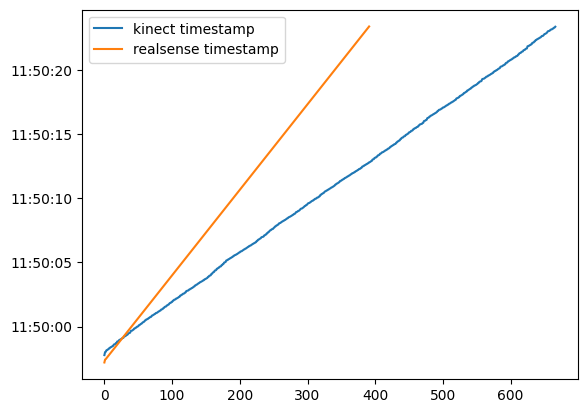

In [27]:
plt.plot(k_df["timestamp"], label="kinect timestamp")
plt.plot(r_df["timestamp"], label="realsense timestamp")
plt.legend()
plt.plot()
k_df["timestamp"].diff()
# r_df["timestamp"].diff()

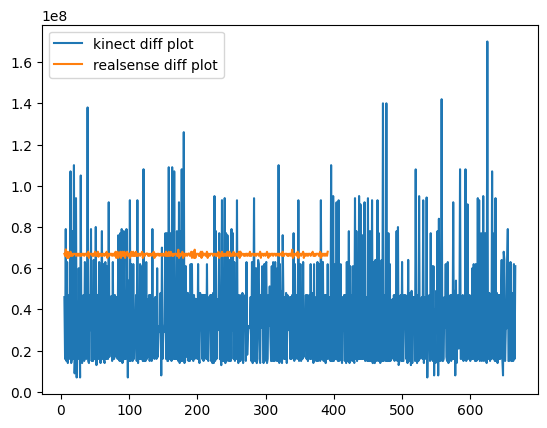

In [29]:
plt.plot(k_df["timestamp"].diff()[5:], label="kinect diff plot")
plt.plot(r_df["timestamp"].diff()[5:], label="realsense diff plot")
plt.legend()